# Imports padrão

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import sparse
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import IPython
import pandas as pd

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d80233ebb9636fc5ac3f93630ffd6928609c5b11bc00010b9686a56f6bd068d3
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# Visualização da matriz de dispersão

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


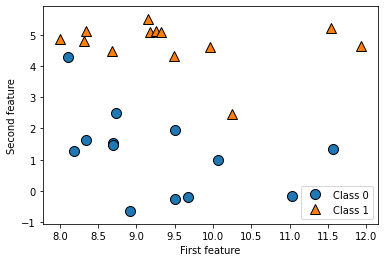

In [ ]:
import mglearn

# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

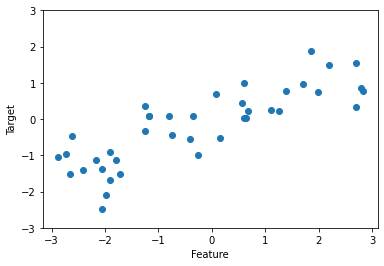

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

# Carregamento do dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


# Visualizando o formato dos dados

In [ ]:
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [ ]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [ ]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {} Y.shape: {}".format(X.shape, y.shape))

X.shape: (506, 104) Y.shape: (506,)


# Modelo 
- KNN

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


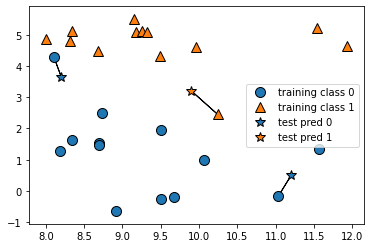

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


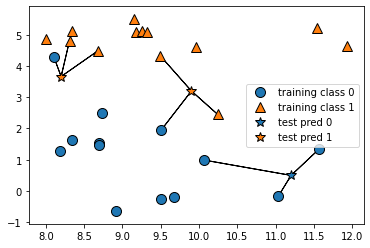

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# Dividindo o conjuto de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Predição

In [ ]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


# Acurácia

In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# Certos tipos de k para o modelo

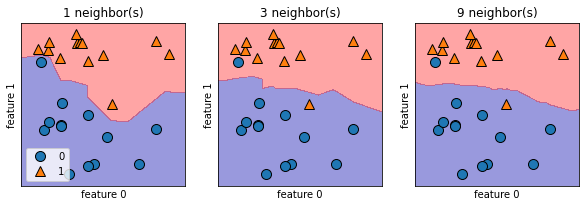

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes): #alguns k's
 # the fit method returns the object self, so we can instantiate
 # o método fit retorna o objeto dele mesmo, então nís podemos instancia-lo
 # and fit in one line
 # e encaixar em uma linha
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# Avaliando o desempenho do treino e teste

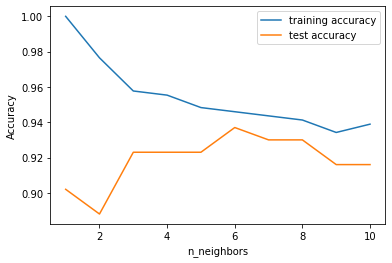

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11) #roda n_neighbors de 1 à 10
for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors) # construindo o modelo
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train)) # registra a precisao setada
  test_accuracy.append(clf.score(X_test, y_test)) #registra a acuracia geral

#plot
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Plots de regressão do livro
- foi adicionado 3 conjuntos de teste que então de verde no eixo x e de azul a predição

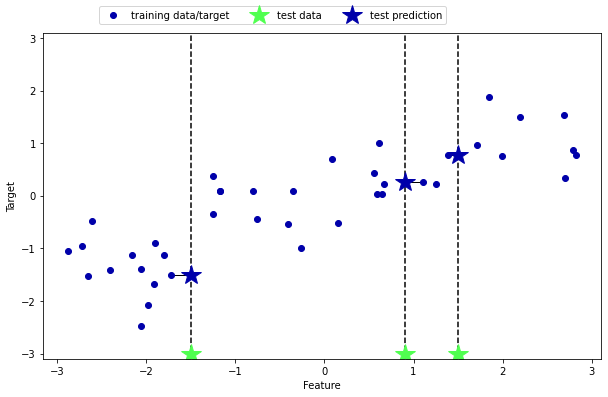

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

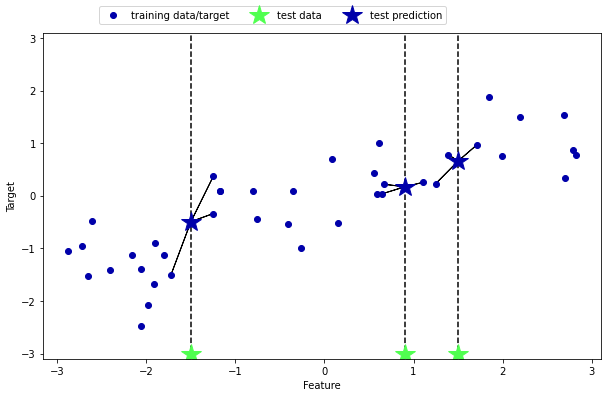

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Algoritmo de regressão sklean
- 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# parte um leva do conjunto dentro do conjuto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instancia o modelo e define o numero de vizinhos considerados a partir de 3
reg = KNeighborsRegressor(n_neighbors=3)
# divide o modelo usando dados de treino e de treinos alvos
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

# Predição do conjunto de teste
- esse metodo de avaliar o modelo "score" retorna um R² score. (coeficiente de determinação) é uma medidade exatidão. o quao bom tá. quanto mais prox de 0, mais perfeito a previsão está.

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


# Avaliando a predição

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# Avaliando o KNeighborsRegressor (regressor KNN )

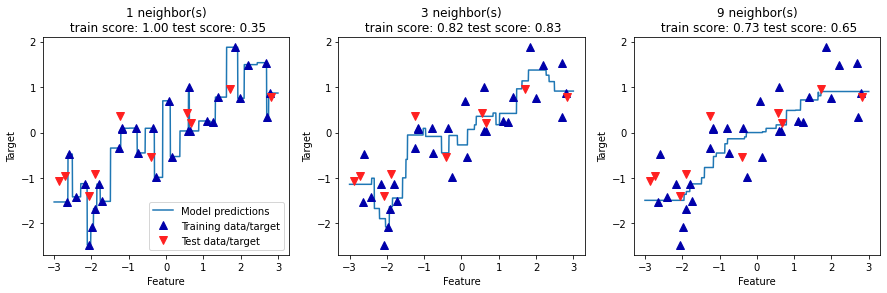

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
# cria mil pontos de dados, separados linearmente entre -3 e 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")

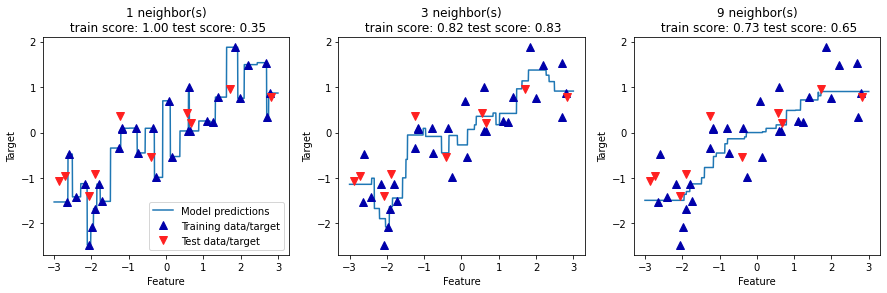

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# cria mil pontos de dados, espaçados uniformemente entre -3 e 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
  # faz predições usando 1, 3 e 9 vizinhos
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title(
  "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
  n_neighbors, reg.score(X_train, y_train),
  reg.score(X_test, y_test)))
  
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")

# Predições de um modelo de regressão linear

- É bom usar quando você tem dados com mais caracteristicas do que pontos de treinos

w[0]: 0.393906  b: -0.031804


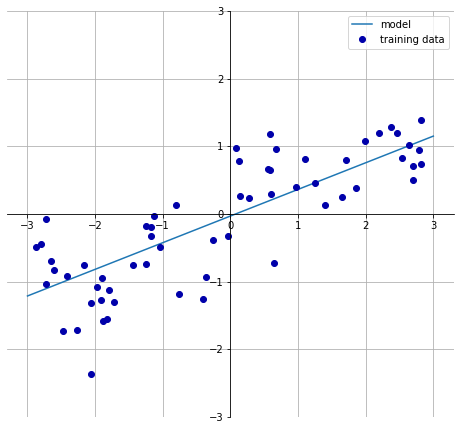

In [ ]:
mglearn.plots.plot_linear_regression_wave()

# (Regressão Linear) Método dos mínimos quadrados
- Encontra w e b de forma a mminimizar o erro médio quadrado entre as predições e o alvo de regressõa verdadeiro y no conjunto de treino.

In [ ]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

lr.coef_ é a inclinação
lr.intercept_ é o ponto onde esta interceptado a linha

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Desempenho do conjunto de treino e teste

É observado que o os valores estão bem próximos, indicando um possível underfitting (dados ajustados demais. Isso se deve ao fato do conjunto de dados ser simples demais.)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Fazendo com um conjunto de dados maior

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Essa descrepância entre a medida de desempenho é claramento um overfitting

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# Ridge regression (regressão de crista)
- É um modelo usado para controlar a complexidade do conjunto de dados.
- todas as entradas de w devem estar próximas de
zero. ou seja, as caracteristicas devem ter pouco impacto no resultado, fazendo a inclinação ser menor possivel

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


Os pontos no conjunto de teste foram maiores, levando a crer q o resultado foi melho, com uma menor descrepância com o conjunto de teste

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


- O alpha quer dizer a complexidade do modelo
- Aumentar o alpha, quer dizer aumentar o coeficiente para mais perto de zero, porem faz com que diminua o desempenho conjunto de treino, mas deve ajudar na generalização

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


Diminuir o alpha permite ser menos restrito a inclinação, podendo ser a mesma da regressão linear e se diminuir ainda mais, faz com que fique menos geral (mais restrito)

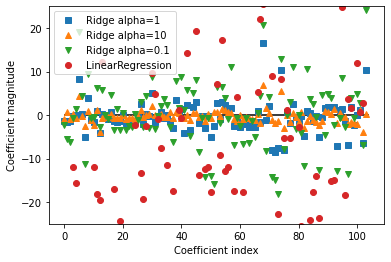

In [ ]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


Comparando magnitudes de coeficientes para regressão de crista com diferentes valores
de regressão alfa e regressão linear

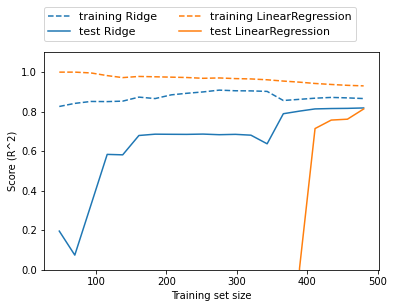

In [ ]:
mglearn.plots.plot_ridge_n_samples()

Curvas de aprendizado para regressão de crista e regressão linear no conjunto de dados de boston

no teste a ridge foi melhor, e no treino a linear foi melhor

Entçao, quanto maior o conjunto de dados, mais dificil será de overfitting

# Lasso
- Uma alternativa da regressão de crista
- tambem restringe o coeficiente mais proximo de zero mas de um jeito mais suave
- usado quando tem um conjunto grande

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


isso mostra que a lasso fez muito ruim. usando 4 features de 105, no caso mostra um underfitting

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Usando um alpha menor pra reduzir o underfitting teve um bom resultado usando apenas 33 features de 105

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Se usado um alpha muito pequeno, o resultado se assemelha a da regressão linear


Text(0, 0.5, 'Coefficient magnitude')

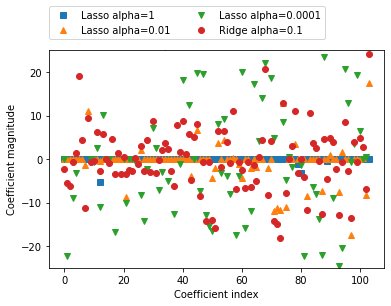

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Plotando coeficientes para diferentes modelos. em azul quase todos os pontos estao em 0. a melhor solução é a 0.01 e 0.1 q sao bastante similares. a verde é bastante desregular

# ElasticNet
- tambem existe o elasticnet onde visa fazer uma combinação de penalidades entre o lesson e a regressao de crista. funciona bem mas precisa de dois parametros pra ser ajustados as regularizações L1 E L2

# Modelo de classificação linear
 - sao bons para em modelos de grandes dimensoes e muitas features

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


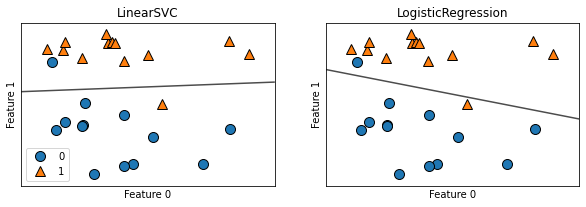

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()

LogisticRegression nao é um algoritmo de regressão, mas sim de classificação.
Note que ambos erraram em uma classe

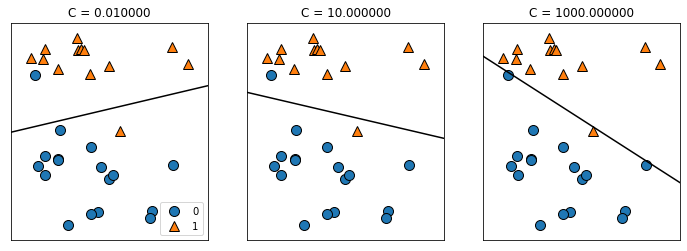

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

este parametro c quanto maior, os dois algoritmos de classificação busca dividir da melhor maneira possivel. por outro lado se for menor, busca encontrar um coeficente vetor w para ser mais proximo de 0

 os pontos enquanto o da esquerda erra alguns com uma linha quase horizontal, o modelo a direita busca classificar fortemente mas pode não capturar o layout geral das classes, onde faz parecer q os dados estao overfitting

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Teve um bom resultado, mas os valores estao muito proximos indicando um udnerfitting (c=1 por default)

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


auementando o c percebe q teve um aumento suave indicando q o modelo esta complexo

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


investigando a regularização do modelo 

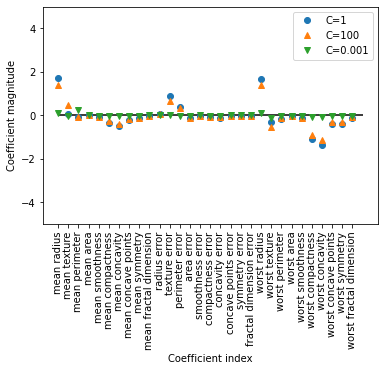

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()


plotando para valores diferentes de C

# Modelo linear para classificação de multiplas classes

- a técnica mais comum é a one-vs-rest approach no qual tenta separar a classe de todas as outras classes resultando em varios modelos binários com essa classe. o classificador q tiver o maior escore sera a classe predita.

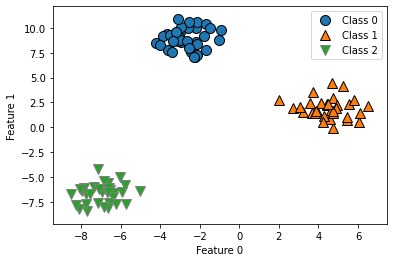

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

conjunto de dados de brinquedo bidimensional contendo três classes

In [ ]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


cada linha do "coef_" contem um vetor de coeficientes para uma das tres classes e cada coluna mantem o valor do coeficiente para um feature especifica (que sao duas). O "intercept_" é um array de uma dimensao armazenando a interceção de cada classe.

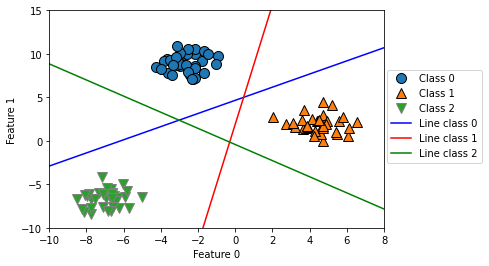

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

aqui é a visualização em linhas dos tres classificadores binarios

- os pontos da classe 0 estão acima da linha da classe 0, oq significa q eles estão "do lado da classe 0" deste classificador binario. 
- os pontos da classe 0 estão acima da linha correspondente a classe 2, que siginifica q eles sao classificados como "rest" pelo classificador binario da classe 2.
- os pontos da classe 0 etão a esquerda da linha correspondente da classe 1 q tambem os classifica como "rest" portanto qualquer ponto dessa area sera classificada como da classe 0 pelo classificador final 

Text(0, 0.5, 'Feature 1')

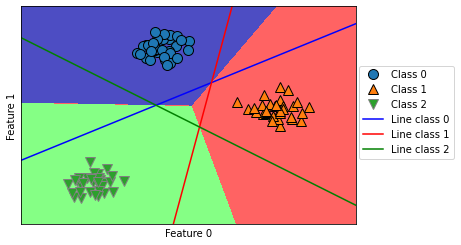

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

predição para todas as regições é a q está mais proxima do centro do triangulo

# Naive Bayes

- é muito eficiente, porem é muito geral do q os outros classificadores linear : LogisticRegression e LinearSVC.
- tem tres tipos:  GaussianNB, BernoulliNB, e MultinomialNB.
  - GaussianNB é aplicado para problemas continuos
  - BernoulliNB assume dados binarios
  - MultinomialNB assume q cada feature é um valor inteiro (contadores)
- BernoulliNB and MultinomialNB são os mais usados

In [ ]:
X = np.array([[0, 1, 0, 1],
 [1, 0, 1, 1],
 [0, 0, 0, 1],
 [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

pra entender o contador de bernolli

- 4 binarios com 4 features (caracteristicas) cada com 2 classes (0 e 1).
- a primeira feature é 0 duas vezes e nao-zero zero vezes
- a segunra é zero uma vez e nao zero-uma vez

In [ ]:
counts = {}
for label in np.unique(y):
  #iteragir para toda classe
  # contador (soma todas sos pares de feature)
  counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


para contar os nao zeros

# Arvores de decisão
- amplamente usado em problemas de classificação
- usado quando : se você precisar de uma representação compacta do processo de tomada de decisão, para resumir a previsão fazendo de uma forma visual para não especialistas
- ruim quando : datasets de altas dimensoes, dados esparsos, como dados de texto

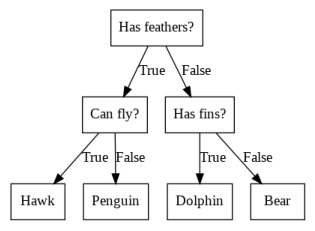

In [ ]:
mglearn.plots.plot_animal_tree()


exemplo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


a precisao no conjunto de treino foi de 100% por causa das folhas puras. a arvore vai crescendo a medida q vai memorizando todas as labels no conjunto de treino. 

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


limitando a profundidade da arvore faz com q fique menos propenso a overfitting na medida q melhora o conjunto de teste

# Analisando a arvore de decisão

- export_graphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

gera um arquivo tree.dot com o grafico

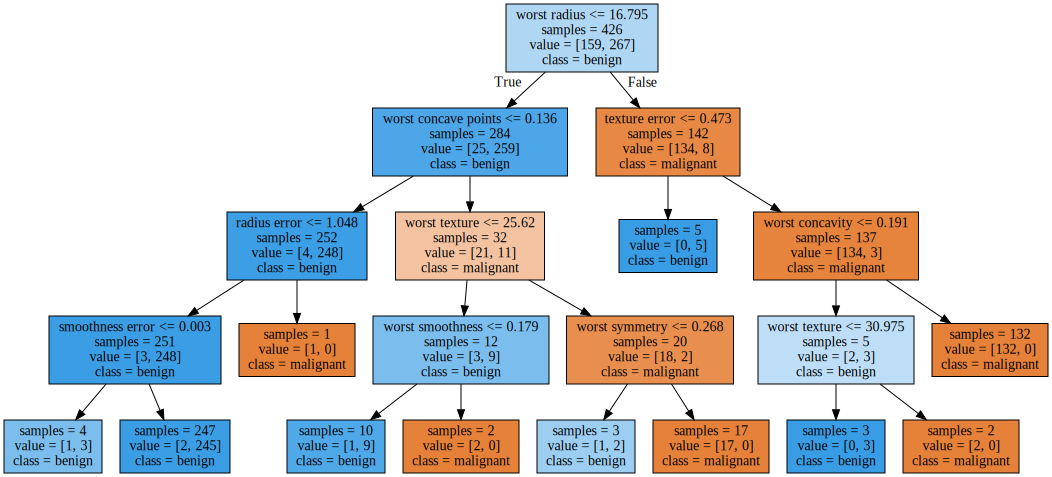

In [ ]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)


visualizando o arquivo com o modeulo "graphviz"
- n_samples da o valor de cada no
- values da o valor de samples por classes

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


caracteristicas importantens para diminuir o trabalho das arvores

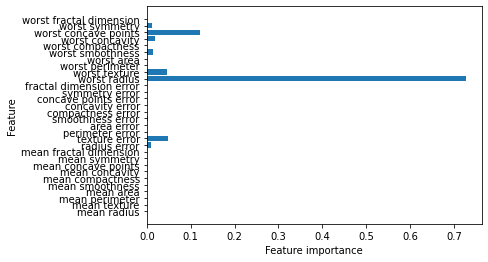

In [ ]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

visualizando as caracteristicas importantes
- a caracteristica worst_radiuos é uma das mais importantes como podemos ver
- quando nao um conjunto nao tem nenhuma caracteristica importante nao quer dizer q é pouco informativa, significa q ela nao foi pega na arvore. certamento pq outra features codificou essa mesma informação

Feature importances: [0. 1.]


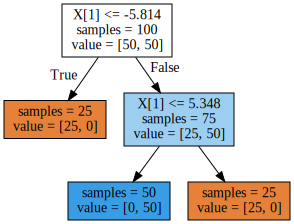

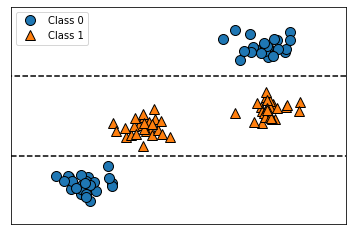

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Um conjunto de dados bidimensional no qual o recurso no eixo y possui um relacionamento notório com o rótulo da classe e os limites de decisão encontrados por uma arvore

# Conjuntos de arvores de decisão
- random forest
- Árvores de regressão reforçadas com gradiente

# Random forest

- basicamente sao varias arvores de decisões uma completamente diferente da outra
- os samples de cada arvore é pegado aleatoreamente

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

exemplo criado com 5 arvores
- bootstrap quer dizer o seguinte: digamos que queremos criar uma amostra de bootstrap da lista ['a', 'b'',"'c', 'd']. Uma possível amostra de bootstrap seria ['b', 'd', 'd', 'c']. Outra amostra possível seria ['d', 'a', 'd', 'a']. Elas podem se repetir

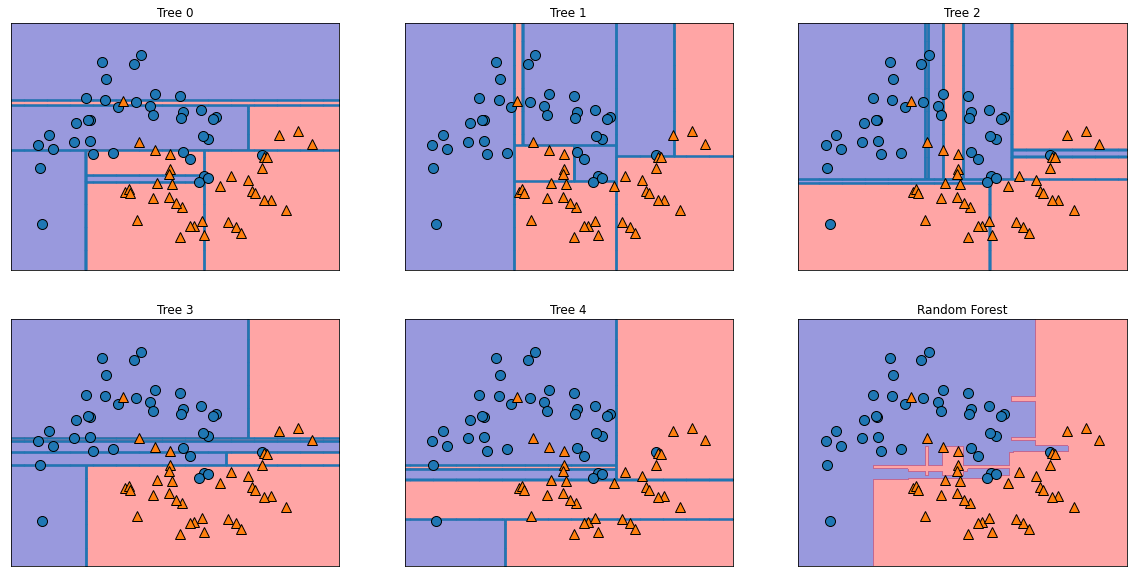

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Limites de decisão encontrados por cinco árvores de decisão aleatórias e o limite de deci‐", obtido pela média de suas probabilidades previstas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


outro exemplo com 100 arvores sem ajustar nenhum parametro
- devemos ajustar o max_features ou aplicar a pre-poda

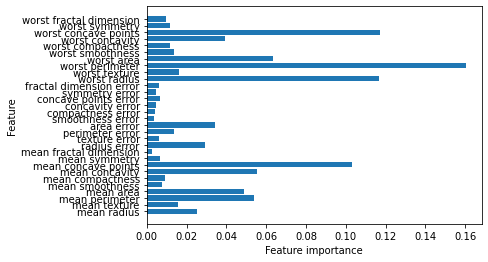

In [ ]:
plot_feature_importances_cancer(forest)

features importantes da radom forest (Breast Cancer dataset)

- da importancia a caracteristicas worst radius, mas é escolhido o worst_perimeter

# Árvores de regressão reforçadas com gradiente
- cria arvores de multiplas decisoes para aumentar o poder do modelo
- arvore de maneira sequencial
- cada arvore tenta corrigir o erro da arvore anterior
- é usado em arvores pequenas, de 1 a 5 (aumentando a velocidade)
- basicamente é pegar modelos fracos e fazer uma arvore de decisão
- learning_rate é um argumento importante onde controla a força q a arvore tem de corrigir o erro

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Precisão no conjunto de treino: {:.3f} ".format(gbrt.score(X_train, y_train)))
print("Precisão no conjunto de teste: {:.3f} ".format(gbrt.score(X_test, y_test)))

Precisão no conjunto de treino: 1.000 
Precisão no conjunto de teste: 0.965 


esta certamente com overfitting. vamos aplicar a pre-poda limitando a profundidade maxima ou o uma menor taxa de aprendizagem

In [ ]:
gbrt = GradientBoostingClassifier(random_state=1, max_depth=1)
gbrt.fit(X_train, y_train)

print("Precisão no conjunto de treino: {:.3f} ".format(gbrt.score(X_train, y_train)))
print("Precisão no conjunto de teste: {:.3f} ".format(gbrt.score(X_test, y_test)))

Precisão no conjunto de treino: 0.991 
Precisão no conjunto de teste: 0.972 


In [ ]:
gbrt = GradientBoostingClassifier(random_state=1, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Precisão no conjunto de treino: {:.3f} ".format(gbrt.score(X_train, y_train)))
print("Precisão no conjunto de teste: {:.3f} ".format(gbrt.score(X_test, y_test)))

Precisão no conjunto de treino: 0.927 
Precisão no conjunto de teste: 0.958 


entao diminuir a profundidade reduz a complexidade da precisao do conjunto de treino enquanto diminuir a taxa de aprendizado diminuir a performace razoavelmente

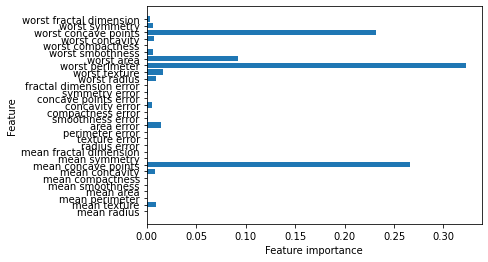

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Importâncias das features calculadas a partir do classificador de aumento de gradiente que foi adequado ao conjunto de dados de Câncer de mama
- podemos ver q é similar a random forest

#Kernelized Support Vector Machines (Máquinas de vetores de suporte kernelizado)
- dimensoes além da 2d
- existem truques para auemntar a dimensao sem aumentar o calculo da nova feature adicionada (kernel trick)
- formas de calculo de altas dimensoes: 
  - kernel polinomial, que calcula todas as possíveis polinômios até um certo grau do recurso original (como feature1 ** 2 * feature2 ** 5)
  - Função de base radial (RBF), Gaussian kernel, corresponde para infinitas dimensoes. é considerado todos os possiveis polinomios de todos os graus mas a importancia da feature decresce para altos graus

Text(0, 0.5, 'Feature 1')

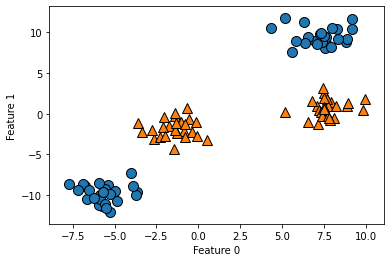

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Conjunto de dados de classificação de duas classes em que as classes não são linearmente separáveis

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

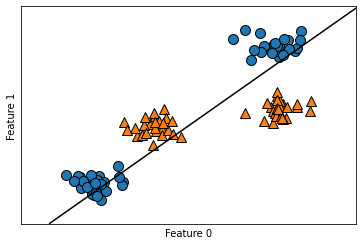

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Limite de decisão encontrado por um SVM linear

Vamos adicionar mais uma feature, adicionando "feature1 ** 2". agora, a representação vai aumentar em mais uma dimensao

Text(0.5, 0, 'feature1 ** 2')

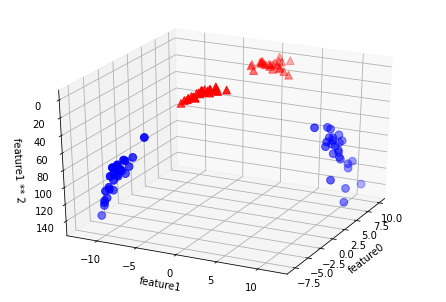

In [ ]:
# adicionando um quadrado pra primeira feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#vizualizando em 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# primeiro plot de todos com y == 0, entao todos com y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


Expansão do conjunto de dados, criado pela adição de um terceiro recurso derivado de feature1

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0 ** 2')

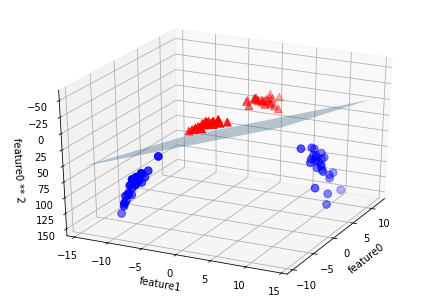

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

agora traçando o limite, o plano foi encontrado o seguinte

Text(0, 0.5, 'Feature 1')

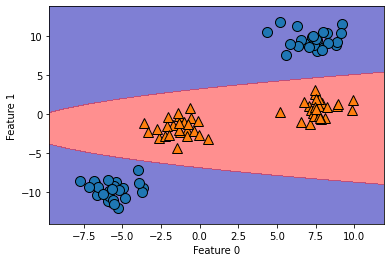

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

o modelo linear nao é realmente linear quando plotado, mas sim uma elipse

# SVMs (Support Vetors Machines) (Máquinas de vetores suporte)
- No treino, a svms aprende o quanto é importante cada ponto de dados no conjutno de treino para poder separar as fronteiras de cada classe


Text(0, 0.5, 'Feature 1')

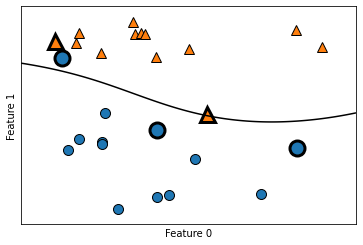

In [ ]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) #repare no parametro gamma
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot vetores suporte
sv = svm.support_vectors_
# rotulos das classes dos vetores suportes sao dados pelo sinal dos residuos dos coeficientes duplos (dual coefficients)
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


- A fronteira de decisão é mostrado em preto

Refinando o parametro gamma das svms

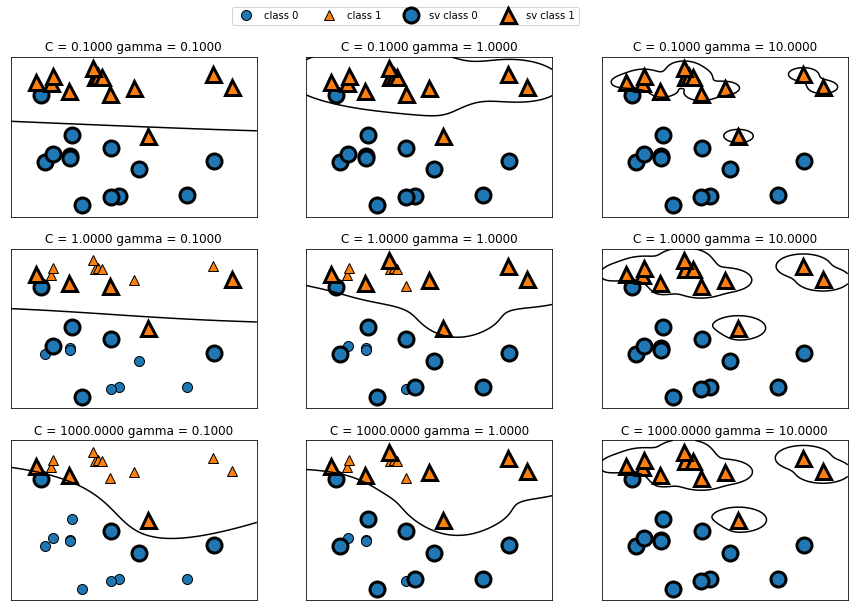

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
 for a, gamma in zip(ax, range(-1, 2)):
  mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
 ncol=4, loc=(.9, 1.2))


- da esqueda pra direita é aumentado o gamma de 0.1 para 10
- um gamma pequeno quer dizer um raio pequeno do kernel, ou seja, mais pontos sao considerados proximo
- quanto maior o gamma, maior é a complexidade do modelo
- de cima pra baixo é aumenta o C de 0.1 para 10
- um C pequeno é um modelo mais restrito, da pra ver quando vc olha mais pra cima, a reta fica mais linear

RBF kernel SVM
- por default, C=1 and gamma=1/n_features:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


- conjunto de dados de cancer
- o modelo tem overfitting consideravelmente

dando uma olhada nos valores maximos e minimos de cada feature, 

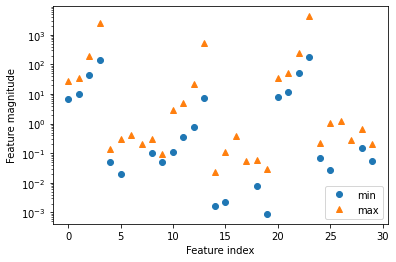

In [ ]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

assim da pra ver os outliears

Pré-processamento do conjunto de dados para SVMs

- um metodo de rescala é colocar os valores entre 0 e 1, resolvendo este problema

In [ ]:
# calculo do valor minimo de cada feature no conjutno de treino
min_on_training = X_train.min(axis=0)
# calculo da distancia de cada feature (max - min) no conjunto de treino
range_on_training = (X_train - min_on_training).max(axis=0)
# subtrai o min, e divide pela distancia
# depois, min=0 e max=1 para cada feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# usando a mesma transformação do conjunto de teste,
# usando min e distancia do conjunto de traino
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


- pode-se ver q a precisão aumentou, mas agora tem-se um underfitting, entao vamos ajustar os parametros para aumentar a complexidade do modelo

In [ ]:
svc = SVC(C=1000) # aumentando o parametro c
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


### Pros e contras das SVMS
 - funciona bem com muitos datasets, porem, pode ser um desafio em termos de processamento de cpu
 - as svms requer q o pre-processamento seja bem feito para poder funcionar bem
 - o parametro mais importante das svms é o C (a escolha do kernel). essa escolha pode ser feita atraves de outra biblioteca do scikit-learn (RBF kerne). o gamma e o C ambos controlam a complexidade do modelo, quanto maior, mais complexo



# Neural Networks (Deep Learning)


### The neural network model

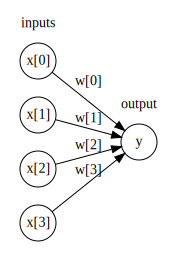

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

- ŷ é o output, a soma dos pesos
      ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

- os inputs representam as features x[0], ... ,x[n]
- oq conecta cada linha são os coeficientes de aprendizagem w[1], ..., w[n]

em um modelo de MPL (Multilayer perceptrons) q é um classificador de rede neural tambem conhecido como 
vanilla, isso é calculado multiplas vezes (primeiro calculando as camadas ocultas (*hidden units*)

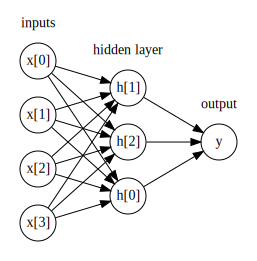

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Ilustração de um perceptron multicamada com uma única camada oculta

- essas camadas ocultas "maqueiam" o resultado final
- quando é aplicada uma função nao linear no resultado final, resulta em outra função chamada *rectifying nonlinearity* (relu) ou tangente hiperbolica

Text(0, 0.5, 'relu(x), tanh(x)')

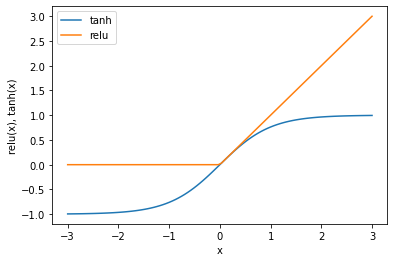

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

A função de ativação da tangente hiperbólica e a ativação linear retificada

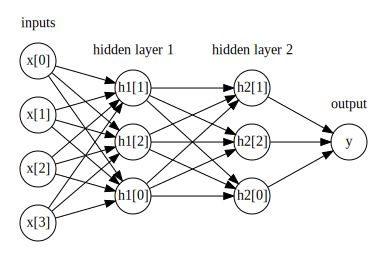

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

tambem é possivel adicionar camadas extras

Text(0, 0.5, 'Feature 1')

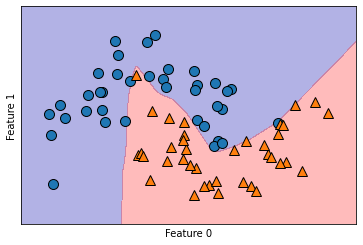

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

com dataset make_moons, foi feito esse teste para MPL. Limite de decisão aprendido por uma rede neural com 100 unidades ocultas (default).

Text(0, 0.5, 'Feature 1')

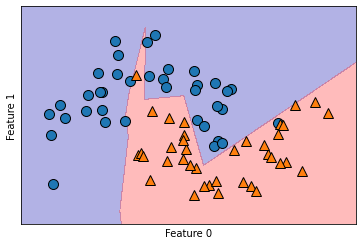

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- reduzindo o numero de camadas ocultas, reduz a complexidade
- observe q as linhas tendem a ser mais retas, é o efeito de reduzir a complexidade

Text(0, 0.5, 'Feature 1')

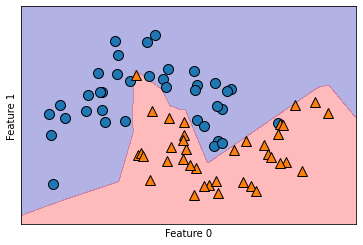

In [ ]:
# usando duas camadas ocultas com 10 unidades cada
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

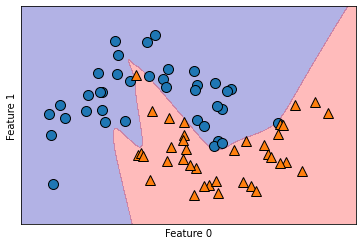

In [ ]:
# usando duas camdas ocultas, com 10 unidades cada, agora com a funcao tanh nao linear
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10]) #funcao tanh q é a relu
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Agora pra sabermos o valor de alpha certo, vamos mostrar e plotar varias funções com valores de alpha diferentes

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


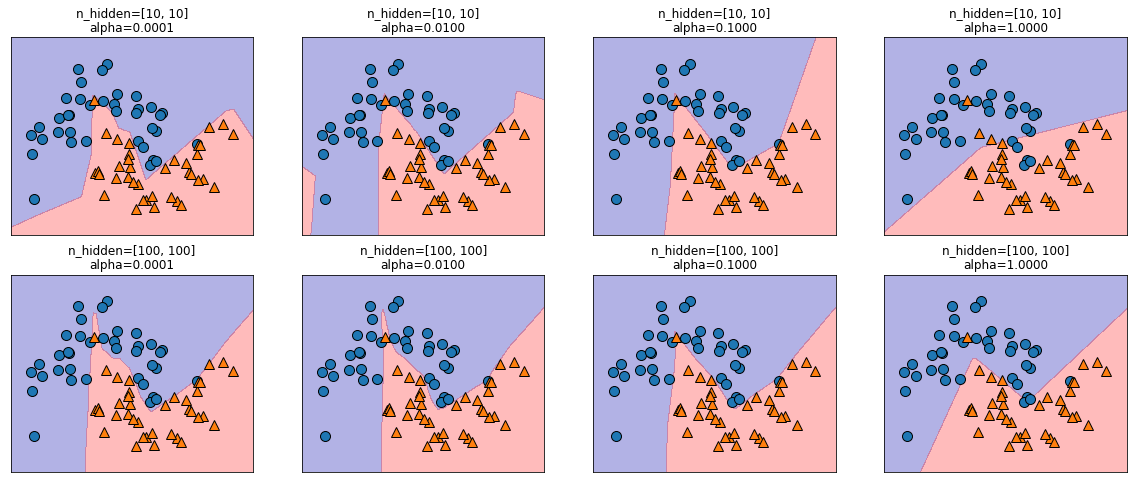

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
 for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
  mlp = MLPClassifier(solver='lbfgs', random_state=0,
  hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
  alpha=alpha)
  mlp.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
  ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
  n_hidden_nodes, n_hidden_nodes, alpha))


Funções de decisão para diferentes números de unidades ocultas e diferentes
configurações do parâmetro alfa

## Os pesos de uma rede neural deve ser iniciada randomicamente antes da aprendizagem, vamos colocar isso para os diferentes valores de alpha

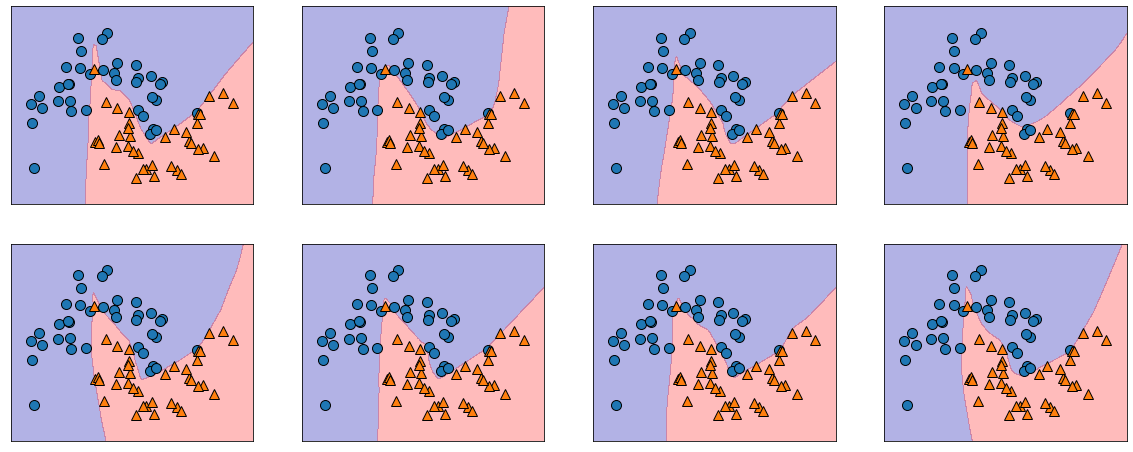

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
 mlp = MLPClassifier(solver='lbfgs', random_state=i,
 hidden_layer_sizes=[100, 100])
 mlp.fit(X_train, y_train)
 mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


## Para ver como funciona na vida real, vamos colocar no dataset de cancer

In [ ]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.94
Accuracy on test set: 0.92


a acuracia do mpl é bastante boa, mas nao tanto quanto os outros modelos

## vamos agora reescalar os dados para poder melhorar essa precisao

In [ ]:
# calculando o valor da media por feature no conjuto de treino
mean_on_train = X_train.mean(axis=0)
# calculando o desvio padrao de cada feature no conjunto de treino
std_on_train = X_train.std(axis=0)
# subtraindo a media, e escala pelo desvio inverso padrao
# depois mean=0 e std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# faz a mesma transformação (usando o mean do treino e std) no conjunto de teste
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


agora com o ajuste da escala, a precisao melhorou muito

## vamos agora colocar um numero maximo de iterações
 - isso faz parte do algoritmo de adam
 - isso nos diz oq devemos aumentar o valor de iterações

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


## aumentando as iterações melhora o proble, mas nao o desempenho em geral
- agora alterando o alpha e diminuindo as iterações

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


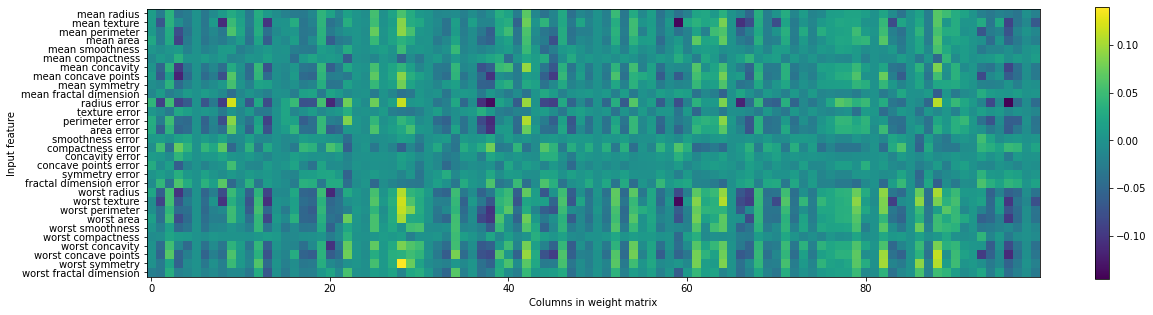

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

As linhas nesta plotagem são
correspondem aos 30 recursos de entrada, enquanto as colunas correspondem aos 100 unidades ocultas. Cores claras representam grandes valores positivos, enquanto cores escuras representam valores negativos-positivos.
- Mapa de calor dos pesos da primeira camada em uma rede neural aprendida no
Conjunto de dados de câncer de mama

podemos concluir que “mean
smoothness” e “mean compactness,” em adição a fetures encontradas entre 
“smoothness error” e “fractal dimension error,” são pesos relativamente baixos
aparado para outros recursos.

## Prós e contras da MPL
- São capazes de capturar informações
de dados contidas em grandes quantidades de dados e criar modelos incrivelmente complexos, dado tempo de computação suficiente.
- Tem um tempo de treino alto pelo fato de tratar com grandes modelos de dados
- Requer muito preprocessamento dos dados
- Como as SVMs, funciona bem para dados homogênios

## Estumando complexidade na rede neural
- o parametro mais importante é o numero de camadase o numero de camadas ocultas por unidade de camada. Deve começar com 1 ou 2 numero de camadas, depois vai aumentando.
- pesos: se você tem 100 features, e vc tem 100 camadas ocultas então existem 100 * 100 = 10.000 pesos entre o input e a primeira camada oculta. ainda há 100 * 1 = 100 pesos entre a camada oculta e a camada de saída. q da um total de 10,100. se adicionar mais uma camada oculta, com 100 unidades ocultas = 100*100 = 10.000, da primeira camada para a segunda, resultando em 20,100 pesos, e assim vai...
- o parametro algoritm por default é adam, na qual funciona bem em situações sensiveis a escalamento, o outro é lbfgs na qual é mais robusto na qual serve mais pra datasets grandes. ainda tem o mais avançado 'sgd' q é mais usado em pesquisas profundas.
- 


# Estimativas de incerteza dos classificadores
- existem funções para saber a incerteza dos classificadores (falsos positivos, etc...) : 'decision_function' e 'predict_proba'.
- varios classificadores tem essas funções, a maioria tem essa ultima (no caso o GradientBoostingClassifier)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# nos renomeamos classe azul e vermelha para proposito de ilustração
y_named = np.array(["blue", "red"])[y]
# nos podemos chamar train_test_split com alguns arrays arbitrarios
# todos irao dividir de uma maneira consistente
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
 train_test_split(X, y_named, y, random_state=0)
# construindo o modelo de aumento do gradiente 
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

formato 

In [ ]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
 gbrt.decision_function(X_test).shape))


X_test.shape: (25, 2)
Decision function shape: (25,)


In [ ]:
# mostra a primeira entrada da decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [ ]:
print("Thresholded decision function:\n{}".format(
 gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))


Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [ ]:
# mazendo o boolean true/false para 0 e 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# usar 0 e 1 para indicar dentro da classe_
pred = gbrt.classes_[greater_zero]
# pred é o mesmo que o resultado de gbrt.predict
print("pred is equal to predictions: {}".format(
 np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


O intervalo da função de decisão pode ser arbitrário e depende dos dados e do
parâmetros do modelo:

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
 np.min(decision_function), np.max(decision_function)))


Decision function minimum: -7.69 maximum: 4.29


No exemplo a seguir, plotamos a função decision_function para todos os pontos no 2D
plano usando um código de cores

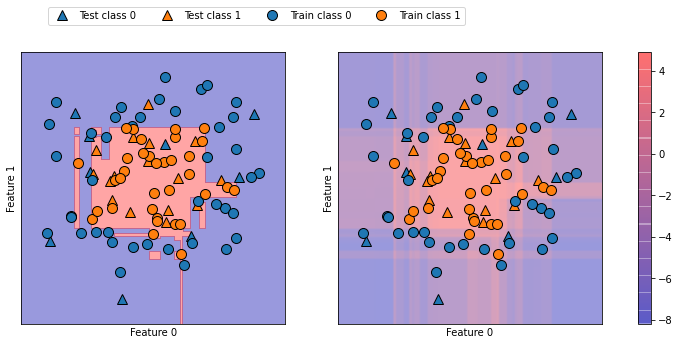

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
 fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
 alpha=.4, cm=mglearn.ReBl)
for ax in axes:
 # plot dos pontos de treino e teste
 mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
 markers='^', ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
 markers='o', ax=ax)
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
 "Train class 1"], ncol=4, loc=(.1, 1.1))


ainda é dificil de dividir as classes

# Prevendo Probabilidades

A saída de predict_proba é uma probabilidade para cada classe e geralmente é mais fácil de ser entendido do que a saída da função decision_. Ela é sempre de forma (n_samples, 2) para classificação binária

In [ ]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


A primeira entrada em cada linha é a probabilidade estimada da primeira classe e a segunda entrada é a probabilidade estimada da segunda classe. Porque é uma probabilidade, a saída de predict_proba está sempre entre 0 e 1 e a soma das entradas para ambas as classes é sempre 1:

In [ ]:
# mostr as primeiras entradas para predict_proba
print("Predicted probabilities:\n{}".format(
 gbrt.predict_proba(X_test[:6])))


Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


mostramos novamente o limite de decisão no conjunto de dados, próximo às probabilidades da classe 1:

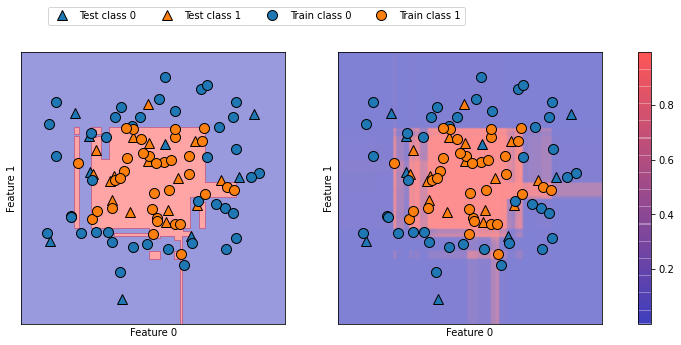

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
 gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
 gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
 # plot training and test points
 mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
 markers='^', ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
 markers='o', ax=ax)
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
 "Train class 1"], ncol=4, loc=(.1, 1.1))


- os limites estao mais bem definidos
- Limite de decisão (esquerda) e probabilidades previstas para o modelo de aumento de gradiente, e a area incerta esta mais definida

# Incerteza na classificação multiclasse

Os métodos decision_function e predict_proba também funcionam na configuração de multiclasse vamos aplicá-los ao conjunto de dados Iris, que é um conjunto de dados de classificação de três classes:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))


Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


tem um formato d (n_samples, n_classes). e cada coluna fornece uma "pontuação de certeza" para cada classe. quando maior, mais certo

In [ ]:
print("Argmax of decision function:\n{}".format(
 np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba

In [ ]:
# mostra a primeira enrtada da predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# mostra a soma do cruzamento de uma linha
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums: [1. 1. 1. 1. 1. 1.]


argmax

In [ ]:
print("Argmax of predicted probabilities:\n{}".format(
 np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))


Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


Para resumir, predict_proba e decision_function sempre têm forma (n_samples , n_classes)

se vc quiser comparar os argumentos, certifique-se de usar o atributo  classes_ attribut do classificador para obter o valor real
nomes de classe:

In [ ]:
logreg = LogisticRegression()
# representa cada alvo por estes nomes de classes na base de dados iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
 logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Resumo de cada modelo
- Vizinhos mais próximos (Nearest neighbors):  Para conjuntos de dados pequenos, bons como linha de base, fáceis de explicar.
- Modelos lineares (Linear models): Primeiro algoritmo a tentar, bom para conjuntos de dados muito grandes, bom para dados dimensionais muito altos.
- Baías ingénuas (Naive Bayes): Somente para classificação. Ainda mais rápido que os modelos lineares, bom para dados muito grandes conjuntos e dados de alta dimensão. Freqüentemente menos preciso que os modelos lineares.
- Árvores de decisão (Decision trees): Muito rápido, não precisa de escala dos dados, pode ser visualizado e facilmente explicado.
- Florestas aleatórias (Random forests): Quase sempre tem um desempenho melhor do que uma única árvore de decisão, muito robusta e poderosa. Não precisa de escala de dados. Não é bom para dados esparsos de alta dimensão.
- Árvores de decisão aprimoradas por gradiente (Gradient boosted decision trees): Frequentemente um pouco mais preciso do que florestas aleatórias. Mais lento para treinar, mas mais rápido para prever do que florestas aleatórias e menor na memória. Precisa de mais parâmetros do que as florestas aleatórias.
- Máquinas de vetores de suporte (Support vector machines): Poderoso para conjuntos de dados de tamanho médio de recursos com significado semelhante. Exigir escala de dados, sensível a parâmetros.
- Redes neurais (Neural networks): Pode construir modelos muito complexos, principalmente para grandes conjuntos de dados. Sensível à escala dados e à escolha dos parâmetros. Modelos grandes precisam de muito tempo para treinamento.